In [2]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
from pandas.api.types import CategoricalDtype

In [4]:
df = pd.read_csv('covid-variants.csv',usecols=['date','location','num_sequences'])
df.head()

,location,date,num_sequences
0,Angola,2020-07-06,0
1,Angola,2020-07-06,0
2,Angola,2020-07-06,0
3,Angola,2020-07-06,0
4,Angola,2020-07-06,0


In [6]:
var = df.query("location == 'India'")
var = var.drop('location', axis=1)
var['date'] = var['date'].astype('datetime64[ns]')
var['Month'] = var['date'].dt.month_name()
var.head()

,date,num_sequences,Month
36360,2020-05-11,0,May
36361,2020-05-11,0,May
36362,2020-05-11,0,May
36363,2020-05-11,0,May
36364,2020-05-11,0,May


In [7]:
cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

var['Month'] = var['Month'].astype(cat_month)

var.dtypes

date             datetime64[ns]
num_sequences             int64
Month                  category
dtype: object

<Figure size 640x480 with 0 Axes>

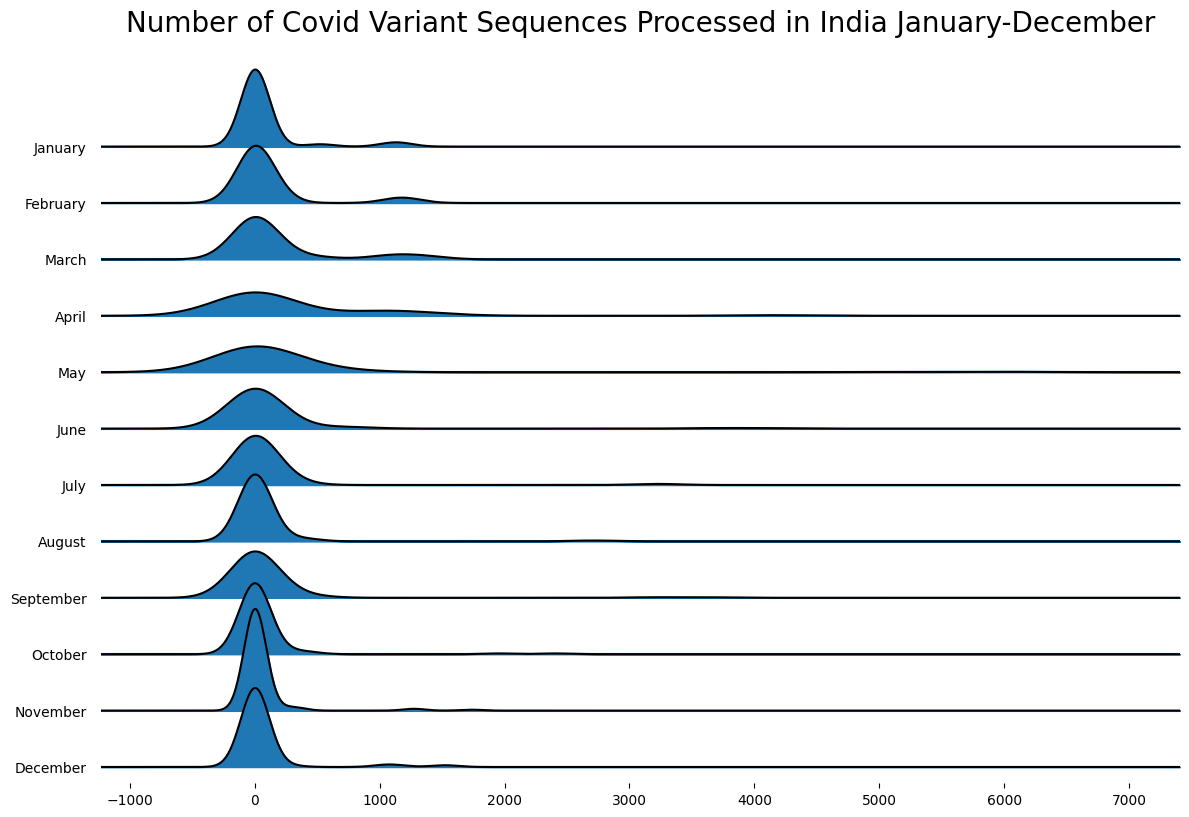

In [8]:
plt.figure()

joyplot(
    data=var[['num_sequences', 'Month']], 
    by='Month',
    figsize=(12, 8)
)
plt.title('Number of Covid Variant Sequences Processed in India January-December', fontsize=20)
plt.show()